In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Loading Data


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## How many survived??

In [5]:
survival_rate = train_data.Survived.sum() / len(train_data.Survived)
print(f'the survival rate is {round(survival_rate * 100)} %')

the survival rate is 38 %


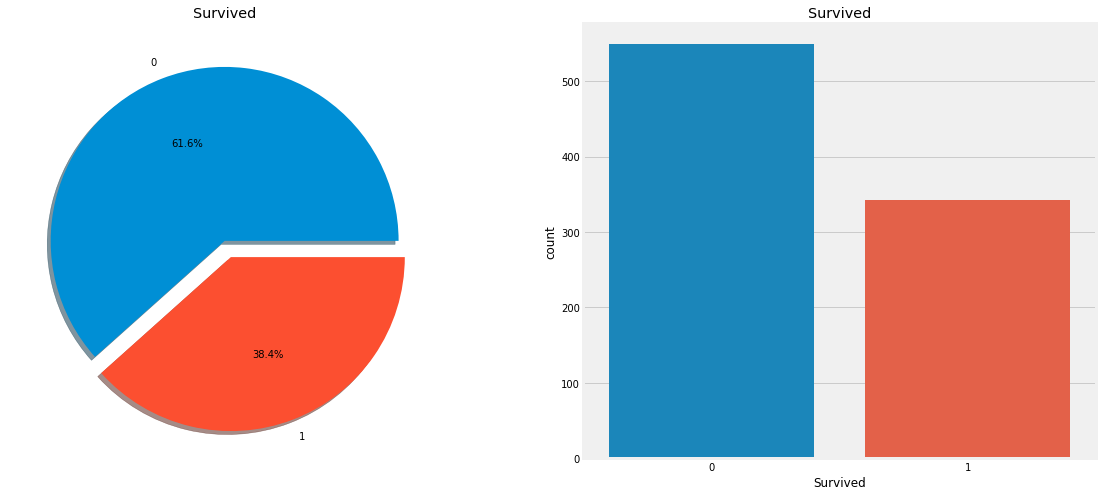

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
train_data.Survived.value_counts().plot.pie(explode = [0,0.1], autopct='%1.1f%%', ax=ax[0],  shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = train_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Analysing The Features

## Sex -> Categorical Feature

In [7]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
train_data.groupby(['Sex', "Survived"])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

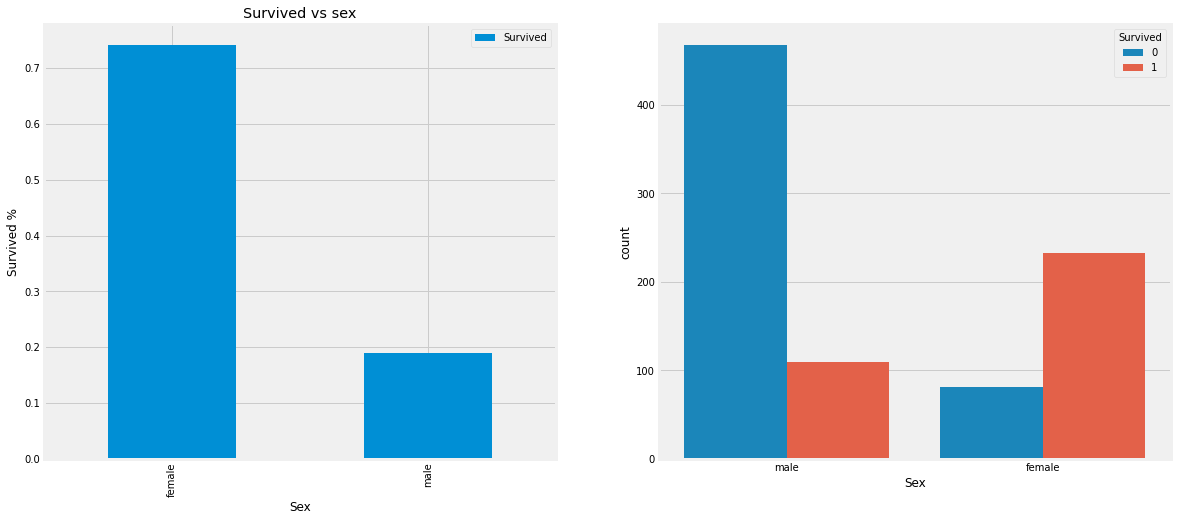

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs sex")
ax[0].set_ylabel('Survived %')
sns.countplot('Sex', hue='Survived', data=train_data, ax=ax[1])
plt.show()

In [10]:
women_survival_rate = train_data.groupby(["Sex", 'Survived'])['Survived'].count()[1] / train_data.Sex.value_counts()[1] 
women_survival_rate

0.7420382165605095

## Pclass -> Ordinal Feature

In [11]:
train_data.groupby(["Pclass", 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [12]:
pd.crosstab(train_data.Pclass, train_data.Survived, margins=True).style.background_gradient(cmap="Blues")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [13]:
survival_rate_P1 = 136/216
survival_rate_P2 = 87/184
survival_rate_P3 = 119/491
print(f'Survial rate of 1st class = {round(survival_rate_P1*100,2)} %,'
f'Survial rate of 2nd class = {round(survival_rate_P2*100,2)} %,'
f'Survial rate of 3rd class = {round(survival_rate_P3*100,2)} %')

Survial rate of 1st class = 62.96 %,Survial rate of 2nd class = 47.28 %,Survial rate of 3rd class = 24.24 %


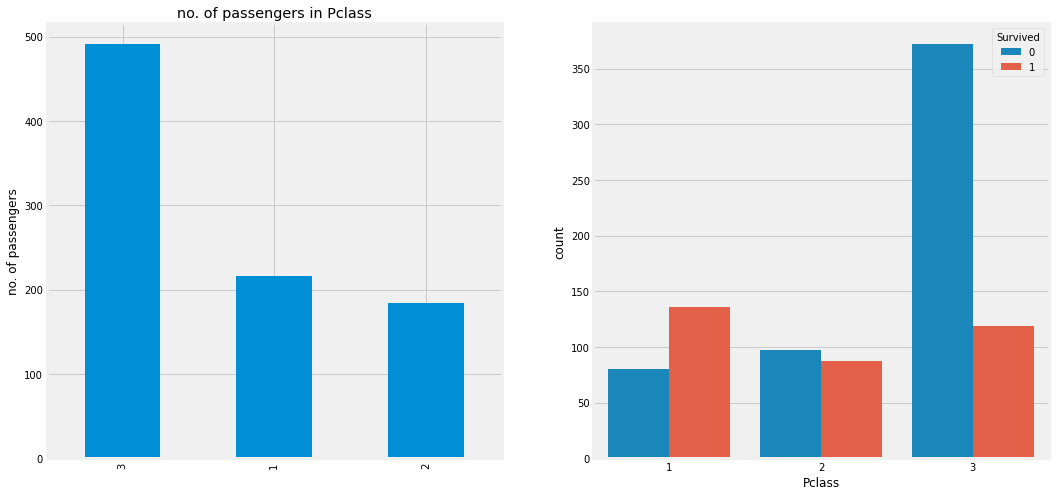

In [14]:
f, ax = plt.subplots(1,2,figsize=(16,8))
train_data.Pclass.value_counts().plot.bar(ax=ax[0])
ax[0].set_title('no. of passengers in Pclass')
ax[0].set_ylabel('no. of passengers')
sns.countplot('Pclass', hue='Survived', data=train_data, ax=ax[1])
plt.show()

In [15]:
train_data.groupby(["Sex", "Survived"])["Pclass"].value_counts()

Sex     Survived  Pclass
female  0         3          72
                  2           6
                  1           3
        1         1          91
                  3          72
                  2          70
male    0         3         300
                  2          91
                  1          77
        1         3          47
                  1          45
                  2          17
Name: Pclass, dtype: int64

In [16]:
pd.crosstab([train_data.Sex, train_data.Survived], train_data.Pclass, margins=True).style.background_gradient(cmap="summer_r")

In [17]:
train_data.groupby(["Pclass", "Survived"])["Sex"].value_counts()

Pclass  Survived  Sex   
1       0         male       77
                  female      3
        1         female     91
                  male       45
2       0         male       91
                  female      6
        1         female     70
                  male       17
3       0         male      300
                  female     72
        1         female     72
                  male       47
Name: Sex, dtype: int64

this above code show the realation of Pclass and Survived to the Sex (i.e. it shows in 1st class 77 male died while only 3 female died which show that women were given priority even if they were in 1st class)

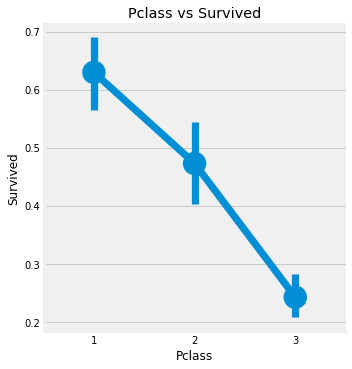

In [18]:
sns.factorplot('Pclass', 'Survived',data=train_data).set(title = "Pclass vs Survived")
plt.show()

above fig show survival rate of people in 1st class to 3rd class

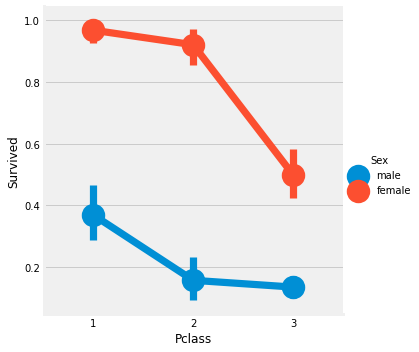

In [19]:
sns.factorplot("Pclass", "Survived", hue='Sex', data=train_data)
plt.show()

## Age --> Continious Features

In [20]:
print('Oldest passenger in train is ',train_data.Age.max(),'years old')
print('Youngest passenger in train is ',train_data.Age.min(),'years old')
print('Mean number of passenger in train is ',train_data.Age.mean(),'years old')

Oldest passenger in train is  80.0 years old
Youngest passenger in train is  0.42 years old
Mean number of passenger in train is  29.69911764705882 years old


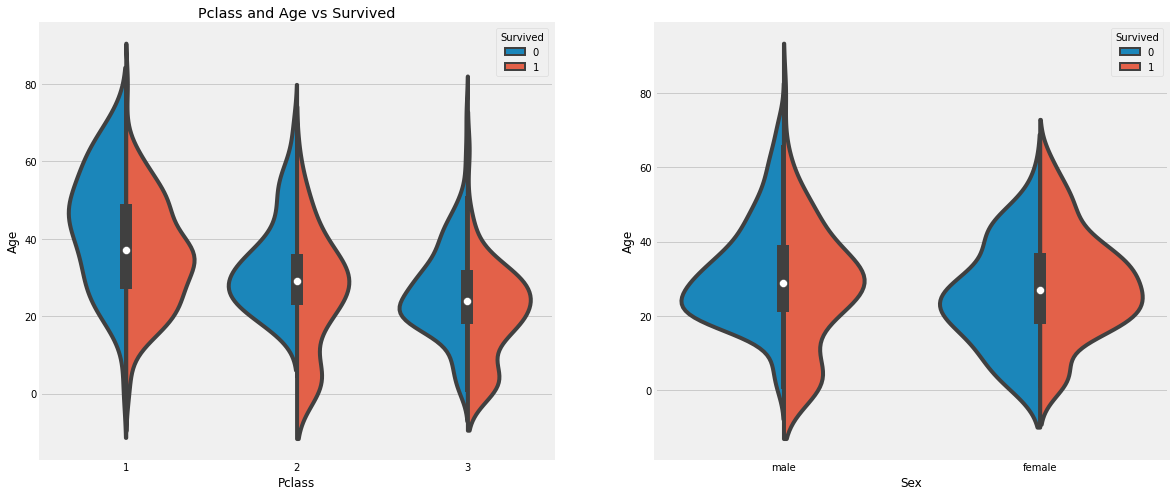

In [21]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train_data,
               split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
sns.violinplot("Sex", "Age", hue="Survived", data=train_data,
               split=True, ax=ax[1])
ax[0].set_title("Pclass and Age vs Survived")

plt.show()

Now, filling the missing values of age, age has 177 missing value so to fill those values we will not be using the mean of total age, rather we will identify their age by Salutation like Mr or Mrs from Name column

### "What's In A Name??"-->Feature ;p

In [22]:
train_data["Initial"] = 0
for i in train_data.Name:
    train_data["Initial"] = train_data.Name.str.extract('([A-za-z]+)\.')

In [23]:
#seperating initials according to sex
pd.crosstab(train_data.Initial, train_data.Sex, margins=True).T.style.background_gradient(cmap='coolwarm')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


Now, replacing the initals into more general ones like mlle which is miss will be replaced to miss and rev,col will be replaced to other

In [24]:
train_data.Initial.replace(['Capt',
'Col',         
'Countess',    
'Don',         
'Dr',          
'Jonkheer',    
'Lady',        
'Major',       
'Master',       
'Miss',        
'Mlle',        
'Mme',         
'Mr',          
'Mrs',
'Ms',
'Rev',
'Sir'   ],['Mr',
'Other',         
'Mrs',    
'Mr',         
'Mr',          
'Other',    
'Mrs',        
'Mr',       
'Master',       
'Miss',        
'Miss',        
'Miss',         
'Mr',          
'Mrs',
'Miss',
'Other',
'Mr'   ], inplace=True)

In [25]:
train_data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## Fillin NaN value of age

In [26]:
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial == 'Mr'), "Age"] = 33

In [27]:
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial == 'Mrs'), "Age"] = 36
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial == 'Master'), "Age"] = 5
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial == 'Miss'), "Age"] = 22
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial == 'Other'), "Age"] = 46

In [28]:
train_data.Age.isnull().any()

False

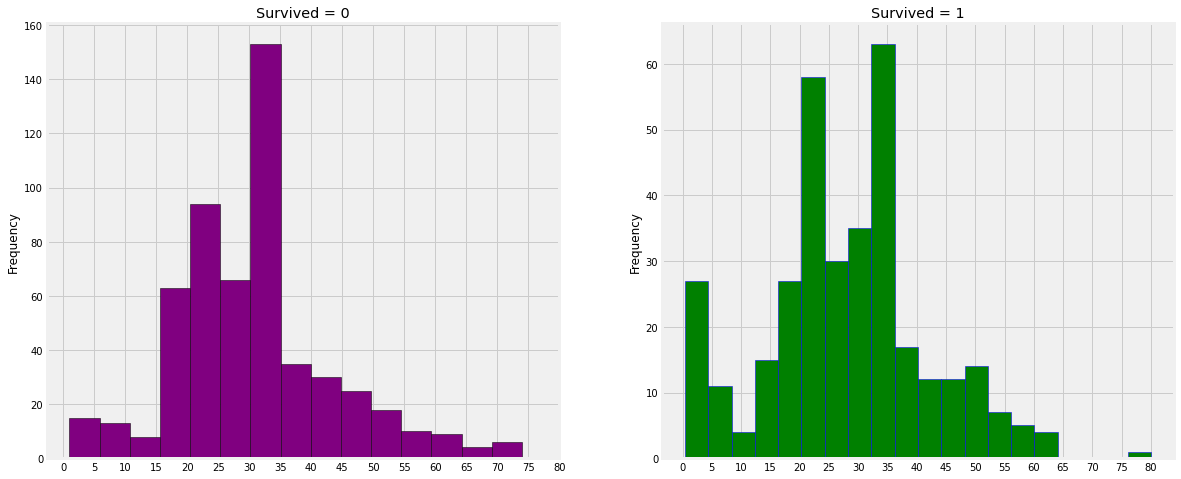

In [29]:
#checking acording to age-group how many survived
f, ax = plt.subplots(1,2,figsize=(18,8))
train_data[train_data.Survived == 0].Age.plot.hist(ax=ax[0], bins=15, edgecolor='black', color='purple')
ax[0].set_title("Survived = 0")
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data.Survived == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='blue', color='green')
ax[1].set_title("Survived = 1")
ax[1].set_xticks(x1)
plt.show()

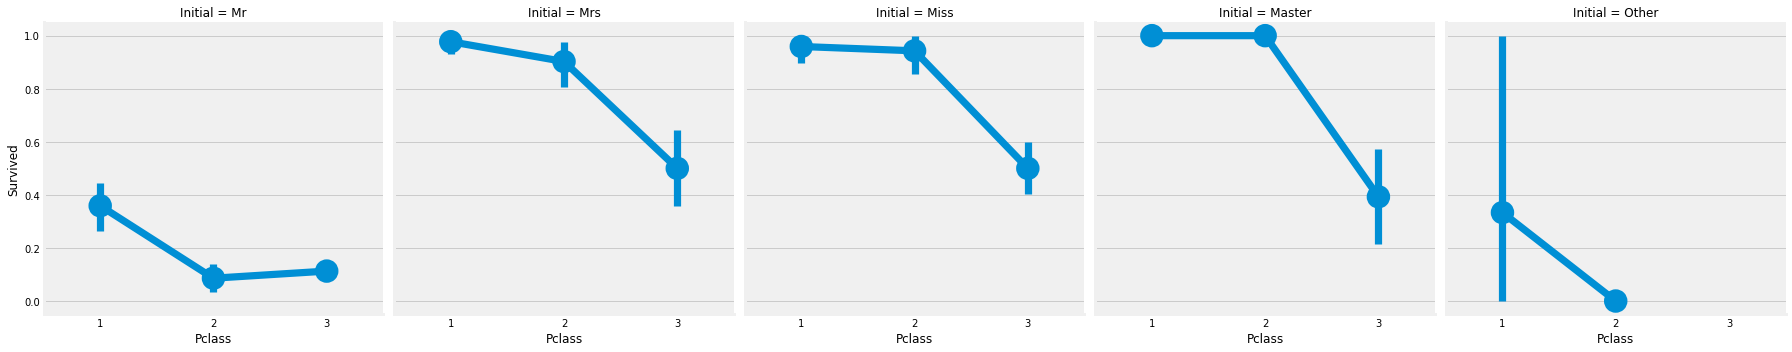

In [30]:
# with factor plot checking if women and child policy is true?
sns.factorplot("Pclass", "Survived", col="Initial", data=train_data)
plt.show()

The women and child survived most, and they also survived accoding to money they pay for Ticket Class

## Embarked --> Categorical value

In [31]:
pd.crosstab([train_data["Embarked"], train_data["Pclass"]],[train_data['Sex'], train_data['Survived']], margins=True).style.background_gradient(cmap="summer_r")

 #### chance of survival from port POV

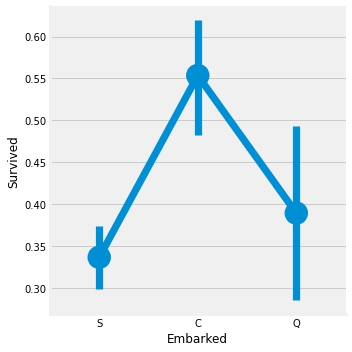

In [32]:
sns.factorplot("Embarked", "Survived", data=train_data)
plt.show()

the chances of survival from S port is minimal while from C port is highest

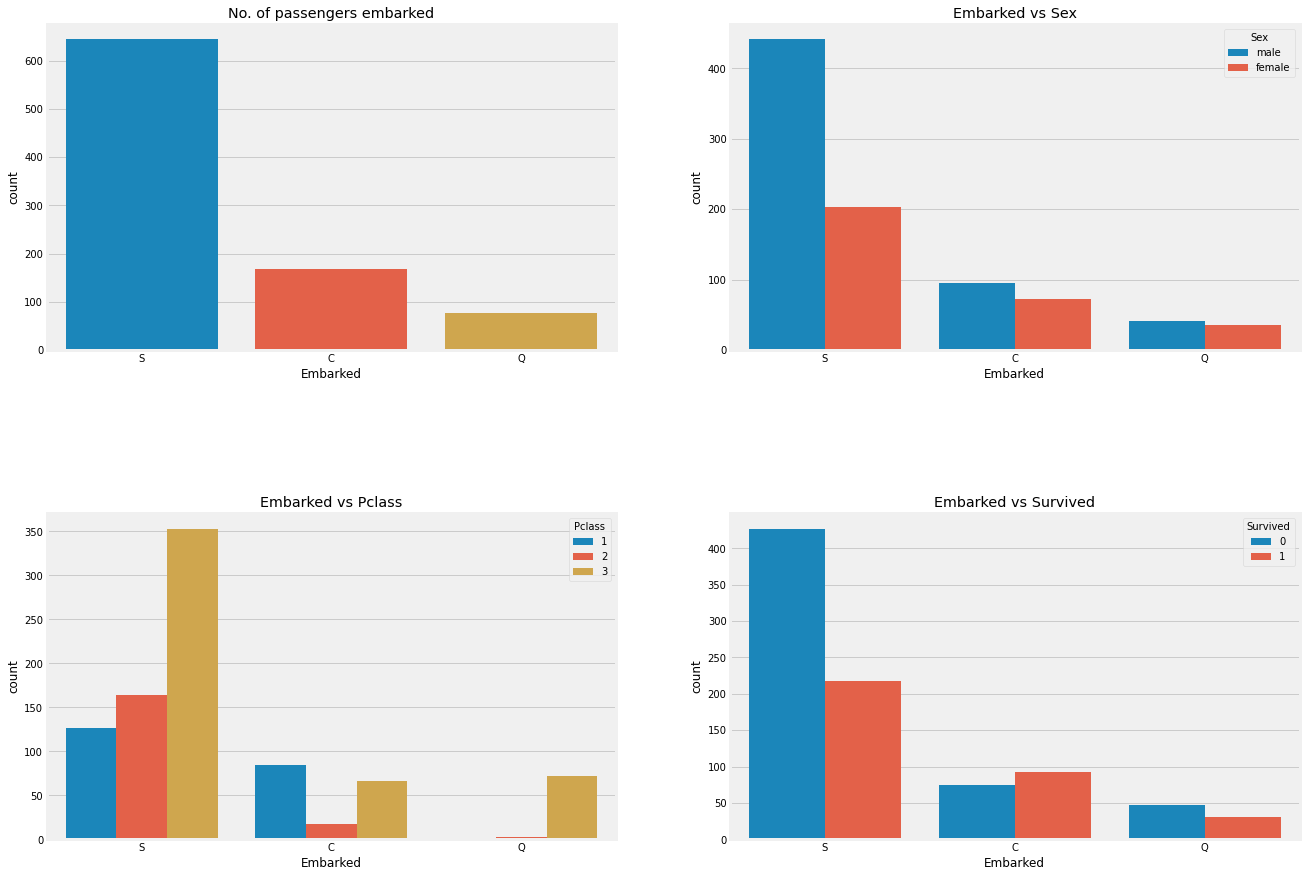

In [33]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot("Embarked", data=train_data, ax=ax[0,0])
ax[0,0].set_title("No. of passengers embarked")
sns.countplot("Embarked", hue="Sex",data=train_data, ax=ax[0,1])
ax[0,1].set_title("Embarked vs Sex")
sns.countplot("Embarked",hue="Pclass", data=train_data, ax=ax[1,0])
ax[1,0].set_title("Embarked vs Pclass")
sns.countplot("Embarked",hue="Survived" ,data=train_data, ax=ax[1,1])
ax[1,1].set_title("Embarked vs Survived")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

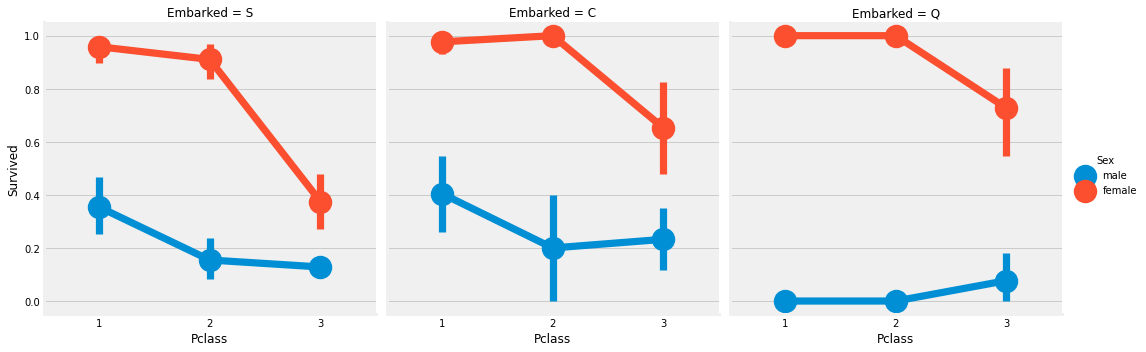

In [34]:
sns.factorplot("Pclass", "Survived", hue="Sex", col="Embarked"
              , data=train_data)
plt.show()

As S port had most number of passenger lets fill null value of embarked by putting S 

In [35]:
train_data.Embarked.fillna("S", inplace=True)

In [36]:
train_data.Embarked.isnull().any()

False

## SibSp --> Discrete Feature

In [37]:
pd.crosstab(train_data.SibSp, train_data.Survived, margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


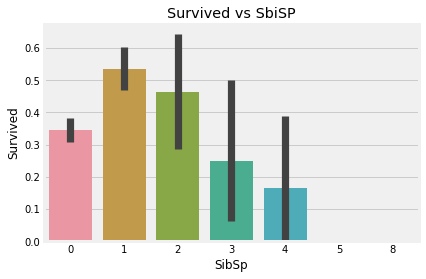

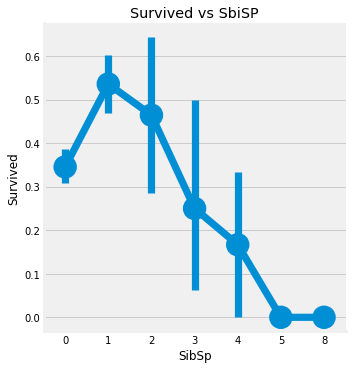

In [38]:
sns.barplot("SibSp", "Survived", data=train_data).set_title("Survived vs SbiSP")
sns.factorplot("SibSp", "Survived", data=train_data).set(title = "Survived vs SbiSP")
plt.show()

In [39]:
pd.crosstab(train_data.SibSp , train_data.Pclass).style.background_gradient(cmap="summer_r")


Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


## Parch

In [40]:
pd.crosstab(train_data.Pclass, train_data.Parch).style.background_gradient(cmap="summer_r")


Parch,0,1,2,3,4,5,6
Pclass,,,,,,,
1,163,31,21,0,1,0,0
2,134,32,16,2,0,0,0
3,381,55,43,3,3,5,1


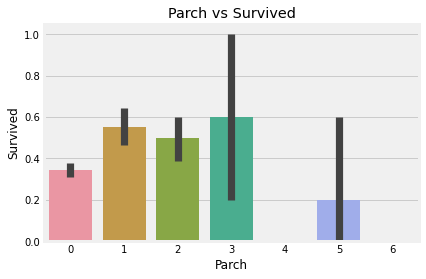

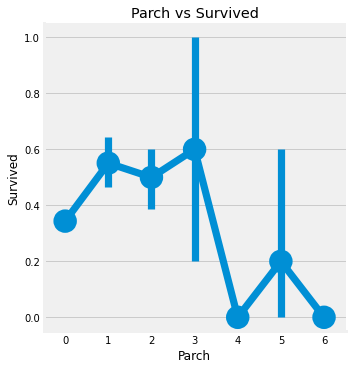

In [41]:
sns.barplot("Parch", "Survived", data=train_data).set_title("Parch vs Survived")
sns.factorplot("Parch", "Survived", data=train_data).set(title="Parch vs Survived")
plt.show()

## Fare --> continious feature

In [42]:
print(f"Highest fare was:", train_data.Fare.max())
print(f"Lowest fare was:", train_data.Fare.min())
print(f"Average fare was:", train_data.Fare.mean())

Highest fare was: 512.3292
Lowest fare was: 0.0
Average fare was: 32.204207968574636


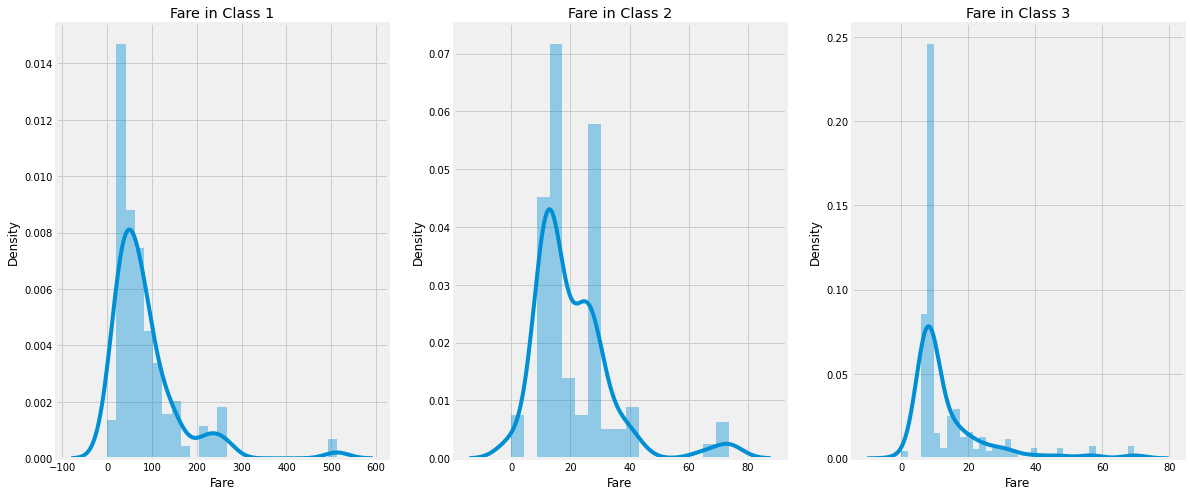

In [43]:
f , ax = plt.subplots(1,3, figsize=(18,8))
sns.distplot(train_data[train_data.Pclass == 1].Fare, ax=ax[0])
ax[0].set_title("Fare in Class 1")
sns.distplot(train_data[train_data.Pclass == 2].Fare, ax=ax[1])
ax[1].set_title("Fare in Class 2")
sns.distplot(train_data[train_data.Pclass == 3].Fare, ax=ax[2])
ax[2].set_title("Fare in Class 3")
plt.show()

## Observations in a Nutshell for all features:
Sex: The chance of survival for women is high as compared to men.

Pclass:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

Age: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

Embarked: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

Parch+SibSp: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

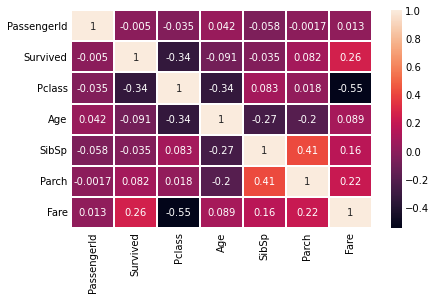

In [44]:
sns.heatmap(train_data.corr(), annot=True, cmap="rocket", linewidth=0.2)
plt.show()

### Interpreting The Heatmap
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

## Part2: Feature Engineering And Data Cleaning
Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

## Age_band the feature extraction for age
We need to convert these continous values into categorical values by either Binning or Normalisation.

 I will be using binning i.e group a range of ages into a single bin or assign them a single value.Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.


In [45]:
train_data["Age_band"] = 0
train_data.loc[train_data.Age <= 16, "Age_band"]= 0
train_data.loc[(train_data.Age > 16) & (train_data.Age <=32), "Age_band"]= 1
train_data.loc[(train_data.Age > 32) & (train_data.Age <=48), "Age_band"]= 2
train_data.loc[(train_data.Age > 48) & (train_data.Age <=64), "Age_band"]= 3
train_data.loc[train_data.Age > 64, "Age_band"]= 4
train_data.head()

    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [46]:
train_data.Age_band.value_counts().to_frame().style.background_gradient(cmap="summer_r")

,Age_band
1,382
2,325
0,104
3,69
4,11


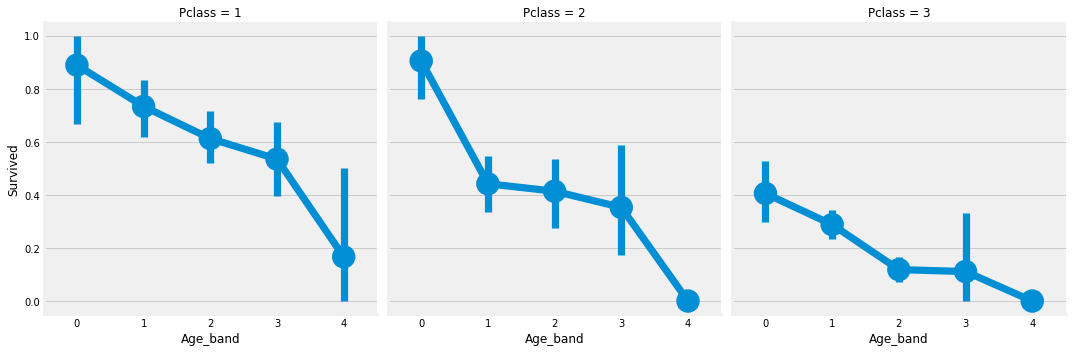

In [47]:
sns.factorplot("Age_band", "Survived", col="Pclass",data=train_data)
plt.show()

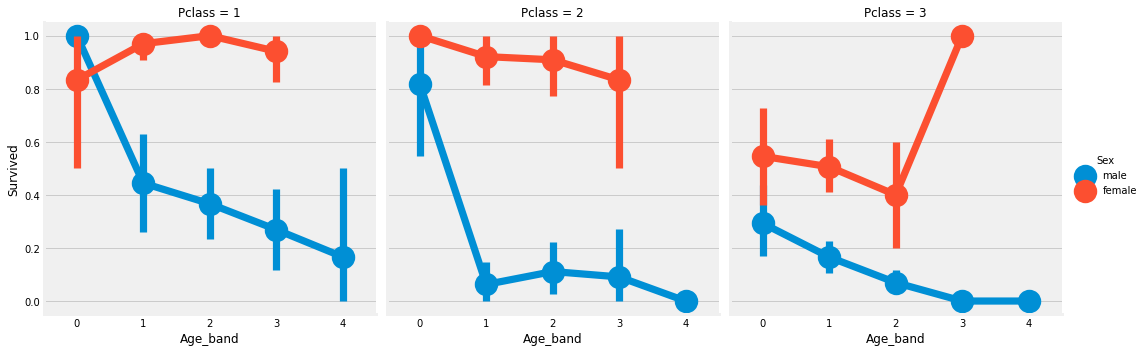

In [48]:
sns.factorplot("Age_band", "Survived", hue="Sex", col="Pclass",data=train_data)
plt.show()

It is true that age matters as children survived most but we can also see ireespective of age female also survived more than men.

## Family_size and Alone <-- Parch & SibSp
if person have sibsp they have sibling or spouse and if person have parch they have guardians which mean same thing, so, to check if people with family have more survival?? rate than lonely?? people can be calaculated

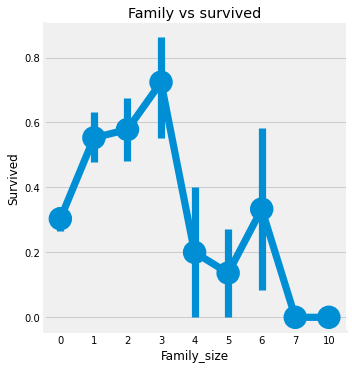

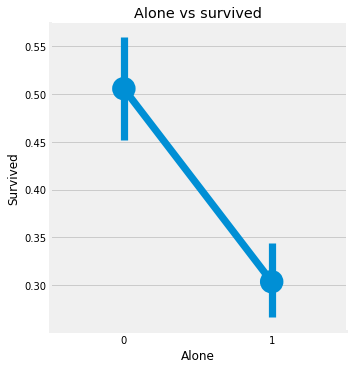

In [49]:
train_data['Family_size']= 0
train_data['Family_size']= train_data.Parch + train_data.SibSp
train_data['Alone'] = 0
train_data.loc[train_data.Family_size==0, "Alone"] = 1


sns.factorplot("Family_size", "Survived", data=train_data).set(title="Family vs survived")
sns.factorplot("Alone", "Survived", data=train_data).set(title="Alone vs survived")
plt.show()

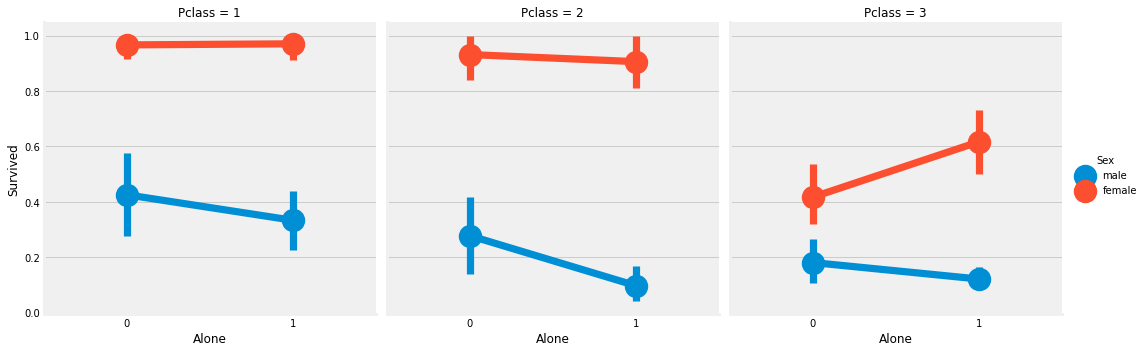

In [50]:
sns.factorplot("Alone", "Survived", hue='Sex', col="Pclass",data=train_data)
plt.show()

## Fare_range 

using pandas.qcut

In [51]:
train_data['Fare_range'] = pd.qcut(train_data.Fare, 4)
train_data.groupby(["Fare_range"])["Survived"].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [52]:
train_data["Fare_cat"] = 0
train_data.loc[train_data.Fare <= 7.91, "Fare_cat"] = 0
train_data.loc[(train_data.Fare > 7.91) & (train_data.Fare <= 14.454) , "Fare_cat"] = 1
train_data.loc[(train_data.Fare > 14.454) & (train_data.Fare <= 31.0), "Fare_cat"] = 2
train_data.loc[(train_data.Fare > 31.0) & (train_data.Fare <= 512.329), "Fare_cat"] = 3


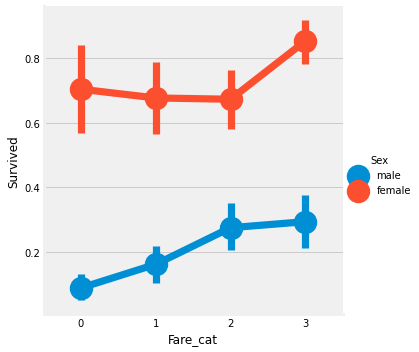

In [53]:
sns.factorplot("Fare_cat", "Survived", hue="Sex",data=train_data)
plt.show()

## Converting string value into Numeric

In [54]:
train_data.Sex.replace(["male", "female"], [0,1], inplace=True)
train_data.Embarked.replace(["S", "C", "Q"], [0,1, 2], inplace=True)
train_data.Initial.replace(["Mr", "Mrs", "Miss","Master", "Other"], [0,1,2,3,4], inplace=True)

## Dropping UnNeeded Features¶
Name--> We don't need name feature as it cannot be converted into any categorical value.

Age--> We have the Age_band feature, so no need of this.

Ticket--> It is any random string that cannot be categorised.

Fare--> We have the Fare_cat feature, so unneeded

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

Fare_Range--> We have the fare_cat feature.

PassengerId--> Cannot be categorised.

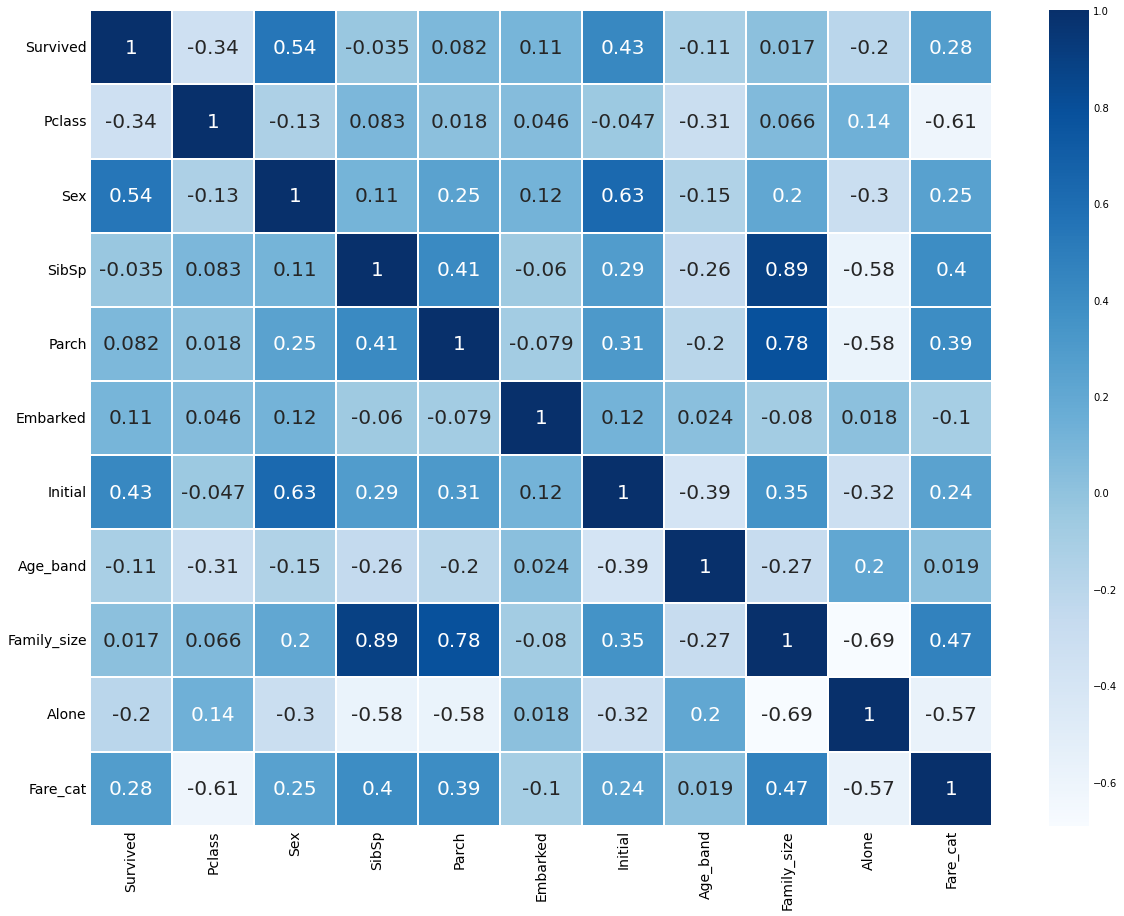

In [55]:
train_data.drop(["Name", "Age", "Ticket", "Fare", "Cabin", "Fare_range", "PassengerId"], axis=1, inplace=True)
sns.heatmap(train_data.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size":20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [56]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Initial',
       'Age_band', 'Family_size', 'Alone', 'Fare_cat'],
      dtype='object')

## Part 3: Predictive Modeling

first splitting data in train and test

In [57]:
#training and testing data split
from sklearn.model_selection import train_test_split

train, test = train_test_split(train_data, test_size=0.3, 
                               random_state=0, stratify=train_data.Survived)
# train_x is features
train_X = train[train.columns[1:]]
# train_Y is prediction value i.e. survived
train_y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_y = test[test.columns[:1]]
X = train_data[train_data.columns[1:]]
Y = train_data.Survived


### Radial Support Vector Machines(rbf-SVM)

In [58]:
# importing svm
from sklearn import svm

# importing accuracy measure
from sklearn import metrics

# as this is classifivation problem we use SVC
model = svm.SVC(kernel='rbf', C =1, gamma = 0.1)
model.fit(train_X, train_y)
prediction1 = model.predict(test_X)
print("Accuracy of rbf SVM is ",metrics.accuracy_score(test_y, prediction1))

Accuracy of rbf SVM is  0.835820895522388


### Linear SVM

In [59]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_y)
prediction2 = model.predict(test_X)
print("Accuracy of linear svm is", metrics.accuracy_score(prediction2,test_y))

Accuracy of linear svm is 0.8171641791044776


### Logistic regression

In [60]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)
prediction3 = model.predict(test_X)
print("Accuracy of logistic regression is", metrics.accuracy_score(prediction3, test_y))


Accuracy of logistic regression is 0.8208955223880597


### Decision Tree


In [61]:
# importing decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction4 = model.predict(test_X)
print("The Accuracy of the Decision tree is ", metrics.accuracy_score(prediction4, test_y))

The Accuracy of the Decision tree is  0.8059701492537313


### K-Nearest Neighbors(KNN)

In [62]:
# importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(train_X, train_y)
prediction5 = model.predict(test_X)
print("Accuracy of the KNN classifier is ", metrics.accuracy_score(prediction5, test_y))

Accuracy of the KNN classifier is  0.8134328358208955


#### checking accuracy of KNN with multiple n_neighbors

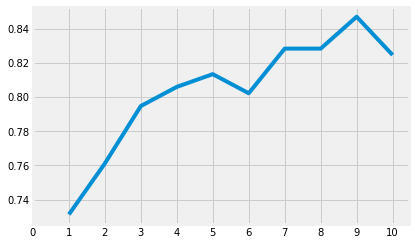

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.82835821 0.84701493 0.82462687] with the max value as  0.8470149253731343


In [63]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))

plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print("Accuracies for different values of n are:",a.values,
      "with the max value as ",a.values.max())

### Gaussian Naive Bayes

In [64]:
# import gayssian naive bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train_X, train_y)
prediction6 = model.predict(test_X)
print("The accuracy of the NaiveBayes is ", metrics.accuracy_score(prediction6, test_y))

The accuracy of the NaiveBayes is  0.8134328358208955


### Random Forests

In [65]:
# importing random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train_X, train_y)
prediction7 = model.predict(test_X)
print("The accuracy of RandomForest is ", metrics.accuracy_score(prediction7,test_y))

The accuracy of RandomForest is  0.8097014925373134


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is No, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as model variance.

To overcome this and get a generalized model,we use Cross Validation.

### Cross Validation
Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [66]:
# imports
from sklearn.model_selection import KFold # for k-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction

kfold = KFold(n_splits=10) # k=10 split data into 10 parts

classifiers = ["Linear Svm", "Radial Svm", "Logistic Regression", 
               "KNN", "Decision Tree", "Naive Bayes", "Random Forest"]
models=[svm.SVC(kernel="linear"), svm.SVC(kernel="rbf"),LogisticRegression(),KNeighborsClassifier(n_neighbors=9), 
        DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

xyz=[] # mean
accuracy = [] # accuracy
std=[] # standard deviation

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring="accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe = pd.DataFrame({'CV Mean': xyz, 'Std': std},index=classifiers)
new_models_dataframe
    
    

,CV Mean,Std
Linear Svm,0.791223,0.045646
Radial Svm,0.828290,0.034427
Logistic Regression,0.803596,0.024186
KNN,0.810424,0.045010
Decision Tree,0.809226,0.025915
Naive Bayes,0.799139,0.028757
Random Forest,0.813733,0.032745


In [67]:
# xyz=[] # mean
# accuracy = [] # accuracy
# std=[] # standard deviation

# for i in models:
#     model = i
#     cv_result = cross_val_score(model, train_X, train_y, cv=kfold, scoring="accuracy")
#     cv_result = cv_result
#     xyz.append(cv_result.mean())
#     std.append(cv_result.std())
#     accuracy.append(cv_result)

# new_models_dataframe = pd.DataFrame({'CV Mean': xyz, 'Std': std},index=classifiers)
# new_models_dataframe

<AxesSubplot:>

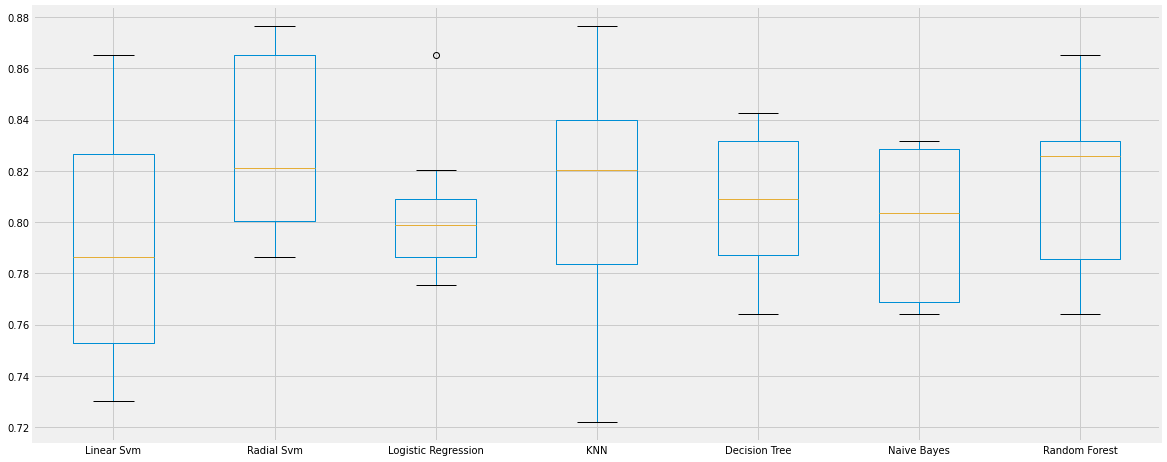

In [68]:
plt.subplots(figsize=(18,8))
box = pd.DataFrame(accuracy, index=classifiers)
box.T.boxplot()

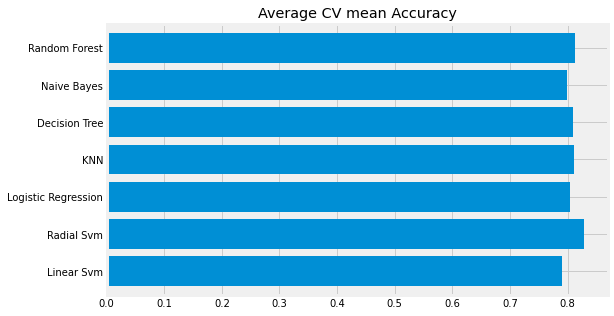

In [69]:
new_models_dataframe["CV Mean"].plot.barh(width=0.8).set(title="Average CV mean Accuracy")
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()


The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

### Confusion Matrix
It gives the number of correct and incorrect classifications made by the classifier.

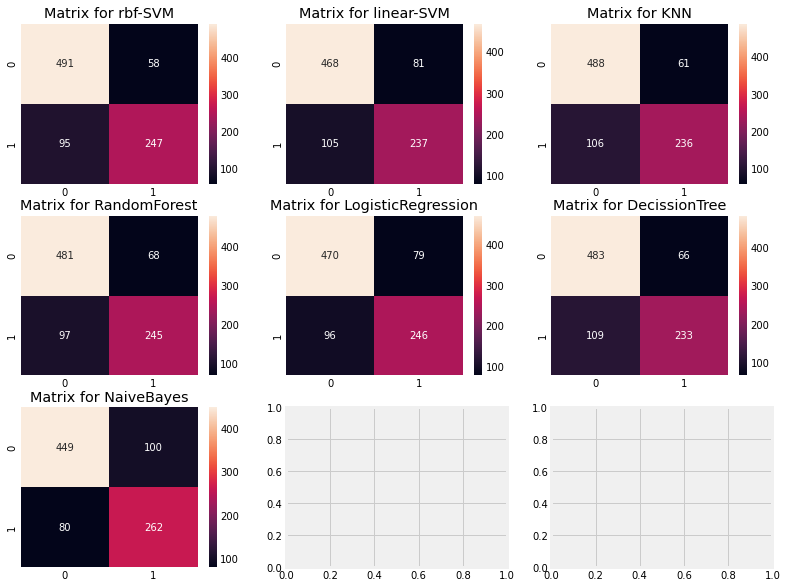

In [70]:
#importing confustion matrix
from sklearn.metrics import confusion_matrix

f, ax = plt.subplots(3,3, figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel="rbf"), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt="2.0f").set(title = "Matrix for rbf-SVM")
y_pred = cross_val_predict(svm.SVC(kernel="linear"), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt="2.0f").set(title = "Matrix for linear-SVM")
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt="2.0f").set(title = "Matrix for KNN")
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt="2.0f").set(title = "Matrix for RandomForest")
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt="2.0f").set(title = "Matrix for LogisticRegression")
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt="2.0f").set(title = "Matrix for DecissionTree")
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt="2.0f").set(title = "Matrix for NaiveBayes")
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()


Interpreting Confusion Matrix
The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are 491(for dead) + 247(for survived) with the mean CV accuracy being (491+247)/891 = 82.8% which we did get earlier.

2)Errors--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

## Hyper-Parameters Tuning
The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

### SVM

In [71]:
# importing grid search CV for hyper-Parameter tunning
from sklearn.model_selection import GridSearchCV

c = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernels = ["rbf", 'linear']
hyper = {"kernel":kernels, "C":c, "gamma":gamma}
gd = GridSearchCV(estimator=svm.SVC(),param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
gd.best_params_

Fitting 5 folds for each of 220 candidates, totalling 1100 fits
0.8282593685267716
SVC(C=0.6, gamma=0.1)


{'C': 0.6, 'gamma': 0.1, 'kernel': 'rbf'}

## Random Forest

In [72]:
n_estimators = range(100,1000,100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8193208210407382
RandomForestClassifier(n_estimators=900, random_state=0)


The best score for Rbf-Svm is __82.82% with C=0.06 and gamma=0.1__. For RandomForest, score is abt __81.9% with n_estimators=900.__

## Ensembling
Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is Ensembling, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting.

## Voting Classifier
It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

In [73]:
# importing voting classifier
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators = [("KNN", KNeighborsClassifier(n_neighbors=10)),
                                                 ("RBF", svm.SVC(probability=True, kernel="rbf", C=0.6, gamma=0.1)),
                                                 ("RFor", RandomForestClassifier(n_estimators=900, random_state=0)),
                                                 ("LR", LogisticRegression(C=0.05)),
                                                 ("DT", DecisionTreeClassifier(random_state=0)),
                                                 ("NB", GaussianNB()),
                                                 ("svm", svm.SVC(kernel="linear", probability=True))
                                                  ],
                                                  voting="soft").fit(train_X,train_y)
                                        
print("the accuracy of ensembled model is:", ensemble_lin_rbf.score(test_X,test_y))
cross = cross_val_score(ensemble_lin_rbf, X,Y, cv=10, scoring="accuracy")
print('The cross validation score is:', cross.mean())


the accuracy of ensembled model is: 0.8246268656716418
The cross validation score is: 0.8249188514357053


## Bagging

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

### Bagged KNN
Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbours, as small value of n_neighbours.

In [74]:
# importing bagging classifier
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print("The accuracy score of bagged KNN is:", metrics.accuracy_score(prediction, test_y))
result = cross_val_score(model, X, Y, cv=10, scoring="accuracy")
print("The cross validated score of bagged KNN is:", result.mean())



The accuracy score of bagged KNN is: 0.8283582089552238
The cross validated score of bagged KNN is: 0.8115480649188515


### Bagged DecisionTree

In [75]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,random_state=0)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print("The accuracy of bagged DecisionTree is ", metrics.accuracy_score(prediction,test_y))
result = cross_val_score(model, X, Y, cv=10, scoring="accuracy")
print("The cross validated score for bagged DescisionTree is ", result.mean())


The accuracy of bagged DecisionTree is  0.832089552238806
The cross validated score for bagged DescisionTree is  0.8160174781523096


## Boosting
Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

### AdaBoost(Adaptive Boosting)
The weak learner or estimator in this case is a Decsion Tree. But we can change the dafault base_estimator to any algorithm of our choice.

In [76]:
# importing Ada bosst
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 200, random_state=0, learning_rate=0.1)

result = cross_val_score(ada, X , Y, cv=10, scoring="accuracy")
print("The cross validated score for AdaBoost is ", result.mean())

The cross validated score for AdaBoost is  0.8271660424469414


### Stochastic Gradient Boosting

In [77]:
# importing Gradient Boostiong Classifier
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(model, X , Y, cv=10, scoring="accuracy")
print("The cross validation score for Gradient Boosting is:", result.mean())

The cross validation score for Gradient Boosting is: 0.8137827715355804


### XGBoost

In [78]:
# importin XGBoost
import xgboost as xg

xgboost = xg.XGBClassifier(n_estimator = 900, learning_rate=0.1)

result = cross_val_score(xgboost, X, Y, cv=10, scoring="accuracy")
print("The cross validation score for gradient boosting is:", result.mean())


[03:09:47] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:09:47] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:09:47] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

We got the highest accuracy for AdaBoost. We will try to increase it with Hyper-Parameter Tuning

### Hyper-Parameter Tuning for AdaBoost

In [79]:
n_esimators = list(range(100,1100,100))
learning_rate = [0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019]

hyper ={"n_estimators": n_estimators, "learning_rate" :learning_rate}

gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
0.8293892411022534
{'learning_rate': 0.012, 'n_estimators': 900}


### Confusion matrix for bestmodel

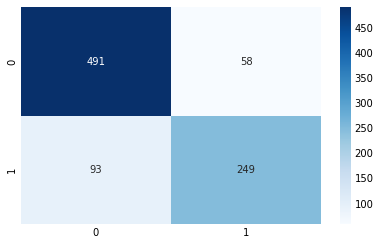

In [80]:
ada = AdaBoostClassifier(n_estimators=900, learning_rate=0.012, random_state=0)
result= cross_val_predict(ada,X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap="Blues", annot=True, fmt="2.0f");

## Feature Importances 

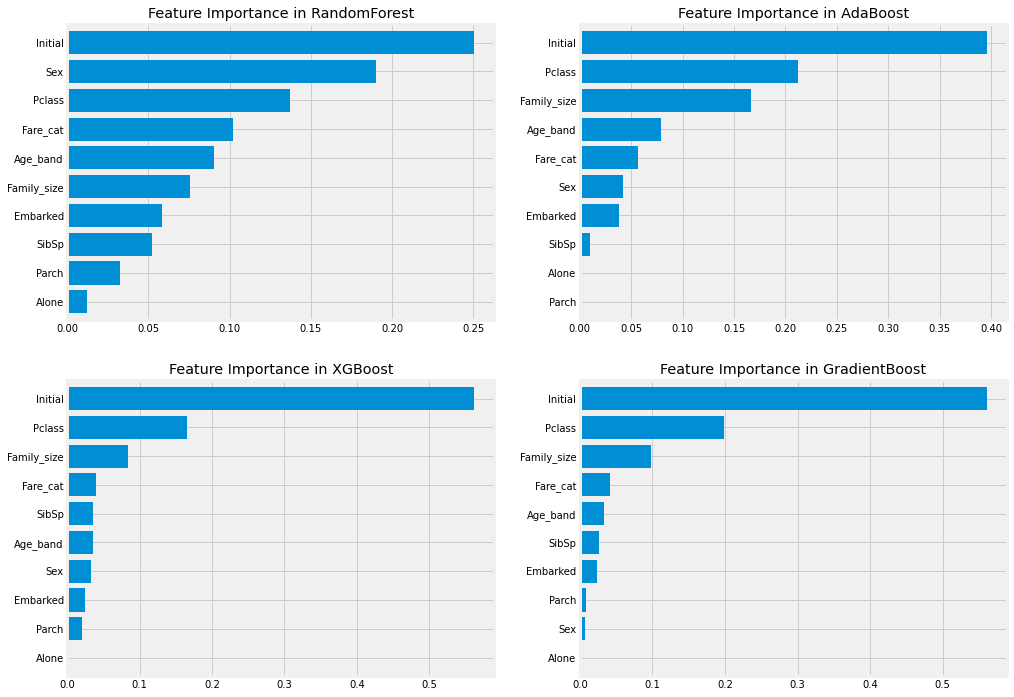

In [81]:
f, ax = plt.subplots(2,2, figsize=(15,12))
model = RandomForestClassifier(n_estimators = 500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0]).set(title="Feature Importance in RandomForest")
model = AdaBoostClassifier(n_estimators=900, learning_rate=0.012)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1]).set(title="Feature Importance in AdaBoost")
model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0]).set(title="Feature Importance in XGBoost")
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1]).set(title="Feature Importance in GradientBoost")
plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

Observations:
1)Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.